# Summary figure

Here we produce the summary figure with the summary statistics of `top-tens' of various quantities in our dataset.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
from collections import Counter
from arxiv_category_dict import *
import requests

# Read in the data without model cards
df = pd.read_csv('data/ai_ecosystem.csv')

df.head()

,model_id,likes,trendingScore,private,downloads,tags,pipeline_tag,library_name,createdAt,regions,licenses,arxiv_papers,datasets,parent_model,finetune_parent,quantized_parent,adapter_parent,merge_parent,languages
0,moonshotai/Kimi-K2-Instruct,479,479.0,False,13356,"['transformers', 'safetensors', 'kimi_k2', 'te...",text-generation,transformers,2025-07-11T00:55:12.000Z,['us'],['other'],[],[],[],[],[],[],[],[]
1,THUDM/GLM-4.1V-9B-Thinking,569,367.0,False,33839,"['transformers', 'safetensors', 'glm4v', 'imag...",image-text-to-text,transformers,2025-06-28T14:24:10.000Z,['us'],['mit'],['2507.01006'],[],['THUDM/GLM-4-9B-0414'],['THUDM/GLM-4-9B-0414'],[],[],[],"['English', 'Chinese']"
2,HuggingFaceTB/SmolLM3-3B,351,351.0,False,21863,"['transformers', 'safetensors', 'smollm3', 'te...",text-generation,transformers,2025-07-08T10:11:45.000Z,['us'],['apache-2.0'],[],[],[],[],[],[],[],"['English', 'French', 'Spanish', 'Italian', 'P..."
3,black-forest-labs/FLUX.1-Kontext-dev,1568,247.0,False,230863,"['diffusers', 'safetensors', 'image-generation...",image-to-image,diffusers,2025-05-28T22:23:43.000Z,['us'],['other'],['2506.15742'],[],[],[],[],[],[],['English']
4,mistralai/Devstral-Small-2507,155,155.0,False,5090,"['vllm', 'safetensors', 'mistral', 'text2text-...",text-generation,vllm,2025-07-04T14:23:44.000Z,['us'],['apache-2.0'],[],[],['mistralai/Mistral-Small-3.1-24B-Instruct-2503'],['mistralai/Mistral-Small-3.1-24B-Instruct-2503'],[],[],[],"['English', 'French', 'German', 'Spanish', 'Po..."


## Data wrangling

In [24]:
df['arxiv_count'] = df['tags'].apply(lambda x: x.count('arxiv:'))
df['arxiv_papers'] = df['tags'].apply(lambda x: [tag.replace('arxiv:', '') for tag in list(ast.literal_eval(x)) if tag.startswith('arxiv:')])

In [25]:
# Flatten the list of arxiv papers and count occurrences
all_arxiv_papers = [paper for sublist in df['arxiv_papers'] for paper in sublist]

# For every arxiv paper in the list, get the subject tags.

def get_arxiv_info(arxiv_id):
    base_url = "http://export.arxiv.org/api/query"
    query = f"id_list={arxiv_id}"
    response = requests.get(base_url, params=query)
    if response.status_code == 200:
        return response.text
    else:
        return None

def get_arxiv_primary_category(arxiv_id):
    base_url = "http://export.arxiv.org/api/query?id_list="
    url = base_url + arxiv_id
    try:
        feed = feedparser.parse(url.replace(' ', ''))
    except:
        print("Error parsing feed for", arxiv_id)
        return None
    
    if feed.entries:
        entry = feed.entries[0]
        primary_category = entry.arxiv_primary_category['term']  # e.g., 'cs.LG'
        return primary_category
    else:
        return None

def get_arxiv_all_categories(arxiv_id):
    base_url = "http://export.arxiv.org/api/query?id_list="
    url = base_url + arxiv_id
    try:
        feed = feedparser.parse(url.replace(' ', ''))
    except:
        print("Error parsing feed for", arxiv_id)
        return None
    if feed.entries:
        entry = feed.entries[0]
        all_categories = [entry.tags[i]['term'] for i in range(len(entry.tags))]
        return all_categories
    else:
        return None

unique_arxiv_papers = list(set(all_arxiv_papers))
print(len(unique_arxiv_papers))

# Create a dictionary where the keys are the arxiv ids and the values are the primary categories.
# Cycle through the unique_arxiv_papers list
#arxiv_primary_category_dict_save = arxiv_primary_category_dict.copy()
arxiv_primary_category_dict = {}
'''
prog = 0
for arxiv_id in unique_arxiv_papers[2:10]:
    if prog % 100 == 0:
        print(f"Progress: {prog}/{len(unique_arxiv_papers)}")
    arxiv_primary_category_dict[arxiv_id] = get_arxiv_primary_category(arxiv_id)
    prog += 1

'''
# Read the dictionary from the txt file
with open('arxiv_primary_category_dict.txt', 'r') as f:
    for line in f:
        try:
            arxiv_id, category = line.strip().split(': ')
            arxiv_primary_category_dict[arxiv_id] = category
        except:
            print(line)


8790
2501.99999: 

2302.70971: 

2023.12345: 



In [26]:
all_arxiv_papers = [paper for sublist in df['arxiv_papers'] for paper in sublist]

'''
arxiv_all_categories_dict = {}

prog = 0
for arxiv_id in unique_arxiv_papers:
    if prog % 100 == 0:
        print(f"Progress: {prog}/{len(unique_arxiv_papers)}")
    arxiv_all_categories_dict[arxiv_id] = get_arxiv_all_categories(arxiv_id)
    prog += 1
'''


'\narxiv_all_categories_dict = {}\n\nprog = 0\nfor arxiv_id in unique_arxiv_papers:\n    if prog % 100 == 0:\n        print(f"Progress: {prog}/{len(unique_arxiv_papers)}")\n    arxiv_all_categories_dict[arxiv_id] = get_arxiv_all_categories(arxiv_id)\n    prog += 1\n'

In [27]:
# Save the dictionary to a txt file
arxiv_all_categories_dict = {}

'''
with open('arxiv_all_categories_dict.txt', 'w') as f:
    for arxiv_id, categories in arxiv_all_categories_dict.items():
        f.write(f"{arxiv_id}: {categories}\n")
'''

# Ready the text file
with open('arxiv_all_categories_dict.txt', 'r') as f:
    for line in f:
        #evaluate the dictionary
        arxiv_id, categories = line.strip().split(': ')
        arxiv_all_categories_dict[arxiv_id] = ast.literal_eval(categories)

print(arxiv_all_categories_dict)

{'2504.14305': ['cs.RO'], '2410.22332': ['cs.RO', 'cs.CV', 'cs.LG'], '2110.02178': ['cs.CV', 'cs.AI', 'cs.LG'], '2412.07360': ['cs.CV'], '2412.04318': ['cs.CL', 'cs.AI'], '2312.06709': ['cs.CV'], '2009.10297': ['cs.SE', 'cs.CL'], '2402.10210': ['cs.LG', 'cs.AI', 'cs.CL', 'cs.CV', 'stat.ML'], '2503.01342': ['cs.CV'], '2501.11120': ['cs.CL', 'cs.AI', 'cs.CR', 'cs.LG'], '2311.07919': ['eess.AS', 'cs.CL', 'cs.LG'], '2304.06762': ['cs.CL', 'cs.AI', 'cs.IR', 'cs.LG'], '2404.02684': ['cs.CL', 'cs.AI', 'cs.LG'], '1904.11492': ['cs.CV', 'cs.AI', 'cs.LG'], '2204.10298': ['cs.CL'], '2410.04415': ['cs.AI', 'cs.LG'], '2309.00359': ['cs.CL', 'cs.CV'], '2502.20323': ['cs.CV'], '2503.15354': ['cs.CL', 'cs.AI'], '2411.16085': ['cs.LG', 'cs.AI', 'cs.CL', 'cs.CV', 'cs.DM'], '2302.08453': ['cs.CV', 'cs.AI', 'cs.LG', 'cs.MM'], '1803.08664': ['cs.CV'], '2408.06646': ['cs.CV'], '2306.02069': ['cs.CL', 'cs.AI', 'cs.LG', '68T50', 'I.2'], '2408.13359': ['cs.CL', 'cs.AI', 'cs.LG'], '2409.08107': ['cs.CL', 'cs.LG

In [28]:
df.columns

Index(['model_id', 'likes', 'trendingScore', 'private', 'downloads', 'tags',
       'pipeline_tag', 'library_name', 'createdAt', 'regions', 'licenses',
       'arxiv_papers', 'datasets', 'parent_model', 'finetune_parent',
       'quantized_parent', 'adapter_parent', 'merge_parent', 'languages',
       'arxiv_count'],
      dtype='object')

## Creating the figure

In [29]:
N=10

In [30]:
df['arxiv_categories'] = df['arxiv_papers'].apply(lambda x: [arxiv_all_categories_dict[paper] for paper in list(set(x)) if paper in arxiv_all_categories_dict])
df['arxiv_categories'] = df['arxiv_categories'].apply(lambda x: list(set([i for sublist in x if sublist is not None for i in sublist if i is not None])))

all_arxiv_categories = [i for sublist in df['arxiv_categories'] for i in sublist]

arxiv_category_counts = Counter(all_arxiv_categories)
top_20_arxiv_categories = arxiv_category_counts.most_common(21)
if None in top_20_arxiv_categories:
    top_20_arxiv_categories.remove((None, None))

print(top_20_arxiv_categories)

top_20_arxiv_categories_cleaned = [(str(category) + " (" + str(arxiv_category_codes_dict[category]) + ")", count) for category, count in top_20_arxiv_categories[:N]]
top_20_arxiv_categories_forplot, counts = zip(*top_20_arxiv_categories_cleaned)

#fig, ax = plt.subplots(1, 1, figsize=(5, 10))
#sns.barplot(y=list(top_20_arxiv_categories_forplot[:10]), x=list(counts[:10]), color='orange')
#ax.set_yticklabels([list(ax.get_yticklabels())[i].get_text() + "\n (" + str(counts[i]) + " models)" for i in range(len(counts))]) 


[('cs.LG', 329296), ('cs.CY', 289447), ('cs.CL', 63044), ('cs.AI', 38571), ('cs.CV', 20812), ('eess.AS', 3759), ('cs.SD', 3431), ('cs.IR', 2843), ('stat.ML', 2606), ('cs.DC', 1640), ('cs.NE', 1622), ('cs.GL', 922), ('cs.PL', 894), ('cs.RO', 761), ('cs.HC', 751), ('cs.SE', 741), ('cs.MM', 584), ('eess.IV', 444), ('I.2.7', 431), ('cs.GR', 336), ('cs.CR', 308)]


In [31]:
df['dataset_count'] = df['tags'].apply(lambda x: x.count('dataset:'))
df['dataset_list'] = df['tags'].apply(lambda x: [tag.replace('dataset:', '') for tag in list(ast.literal_eval(x)) if tag.startswith('dataset:')])

all_datasets = [tag for sublist in df['tags'] for tag in list(ast.literal_eval(sublist)) if tag.startswith('dataset:')]
dataset_counts = Counter(all_datasets)

print(dataset_counts)

top_20_datasets = dataset_counts.most_common(20)
if None in top_20_datasets:
    top_20_datasets.remove((None, None))

top_20_datasets_cleaned = [(str(dataset).replace('dataset:', ''), count) for dataset, count in top_20_datasets[:N]]
top_20_datasets_forplot, counts = zip(*top_20_datasets_cleaned)



Counter({'dataset:imagefolder': 5143, 'dataset:glue': 3518, 'dataset:generator': 3271, 'dataset:squad': 1862, 'dataset:emotion': 1768, 'dataset:imagenet-1k': 1563, 'dataset:mozilla-foundation/common_voice_11_0': 1501, 'dataset:mozilla-foundation/common_voice_7_0': 1333, 'dataset:imdb': 1331, 'dataset:wikipedia': 1309, 'dataset:HuggingFaceH4/ultrafeedback_binarized': 1259, 'dataset:conll2003': 1259, 'dataset:xtreme': 1198, 'dataset:teknium/OpenHermes-2.5': 1131, 'dataset:fka/awesome-chatgpt-prompts': 1048, 'dataset:microsoft/orca-math-word-problems-200k': 960, 'dataset:HuggingFaceH4/ultrachat_200k': 908, 'dataset:common_voice': 883, 'dataset:allenai/MADLAD-400': 830, 'dataset:m-a-p/CodeFeedback-Filtered-Instruction': 817, 'dataset:marsyas/gtzan': 792, 'dataset:cis-lmu/Glot500': 788, 'dataset:Open-Orca/OpenOrca': 775, 'dataset:bigcode/starcoderdata': 767, 'dataset:samsum': 741, 'dataset:cognitivecomputations/dolphin-coder': 731, 'dataset:allenai/c4': 723, 'dataset:LDJnr/Capybara': 700, '

In [33]:
# Convert the string representation of lists into actual lists
df['languages_cleaned'] = df['languages'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Flatten the list of languages and count occurrences, omitting t5 and tf.
all_languages = [language for sublist in df['languages_cleaned'] for language in sublist]
all_languages = [language for language in all_languages if language not in ['t5', 'tf']]

language_counts = Counter(all_languages)

print(language_counts)


Counter({'English': 221550, 'Chinese': 12917, 'French': 11754, 'Spanish': 10711, 'German': 10532, 'Japanese': 8985, 'Korean': 8475, 'Italian': 8361, 'Portuguese': 8284, 'Russian': 6595, 'Hindi': 5970, 'Arabic': 5058, 'Thai': 4564, 'Indonesian': 3820, 'Turkish': 3759, 'Vietnamese': 3735, 'Polish': 3689, 'Dutch': 3195, 'Romanian': 2654, 'Swedish': 2515, 'Ukrainian': 2385, 'Czech': 2362, 'Persian': 2359, 'Finnish': 2331, 'Nepali (macrolanguage)': 2216, 'Bengali': 2163, 'Hebrew': 1916, 'Modern Greek (1453-)': 1904, 'Danish': 1859, 'Malay (macrolanguage)': 1801, 'Tamil': 1777, 'Catalan': 1684, 'Hungarian': 1678, 'Bulgarian': 1636, 'Urdu': 1613, 'Serbian': 1509, 'Swahili (macrolanguage)': 1488, 'Norwegian': 1482, 'Marathi': 1480, 'Telugu': 1455, 'Estonian': 1396, 'Slovenian': 1378, 'Burmese': 1367, 'Malayalam': 1347, 'Gujarati': 1340, 'Slovak': 1336, 'Galician': 1305, 'Lithuanian': 1290, 'Tagalog': 1279, 'Croatian': 1261, 'Khmer': 1244, 'Basque': 1236, 'Latvian': 1222, 'Kannada': 1210, 'Icel

In [ ]:
df['licenses_cleaned'] = df['licenses'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

all_licenses = [license for sublist in df['licenses_cleaned'] for license in sublist]
license_counts = Counter(all_licenses)

print(license_counts)

top_n_licenses = license_counts.most_common(N)
top_n_licenses = [(license, count) for license, count in top_n_licenses]
licenses, counts = zip(*top_n_licenses)
sns.barplot(y=list(licenses), x=list(counts), color='orange', width=.9)


Counter({'apache-2.0': 298442, 'mit': 109820, 'other': 81887, 'openrail': 37498, 'creativeml-openrail-m': 29233, 'cc-by-nc-4.0': 14315, 'llama2': 10294, 'llama3': 9887, 'gemma': 8677, 'unknown': 8368, 'llama3.1': 7614, 'cc-by-4.0': 6737, 'openrail++': 6552, 'llama3.2': 5863, 'cc-by-nc-sa-4.0': 3945, 'afl-3.0': 3657, 'cc-by-sa-4.0': 2984, 'gpl-3.0': 2875, 'artistic-2.0': 1942, 'llama3.3': 1849, 'cc': 1846, 'bigscience-bloom-rail-1.0': 1840, 'bigscience-openrail-m': 1742, 'bigcode-openrail-m': 1487, 'bsd-3-clause': 1363, 'cc-by-nc-nd-4.0': 1338, 'agpl-3.0': 969, 'wtfpl': 913, 'cc0-1.0': 779, 'unlicense': 754, 'bsd': 555, 'gpl': 523, 'bsl-1.0': 476, 'cc-by-sa-3.0': 408, 'bsd-2-clause': 324, 'cc-by-2.0': 298, 'cc-by-nc-2.0': 270, 'c-uda': 261, 'gpl-2.0': 216, 'cc-by-nd-4.0': 208, 'cdla-permissive-2.0': 203, 'cc-by-3.0': 196, 'llama4': 180, 'lgpl-3.0': 169, 'bsd-3-clause-clear': 167, 'cc-by-nc-3.0': 151, 'osl-3.0': 129, 'cc-by-2.5': 111, 'pddl': 104, 'apple-amlr': 99, 'ms-pl': 99, 'gfdl': 9

<Axes: title={'center': ' '}, xlabel=' ', ylabel=' '>

<Axes: >

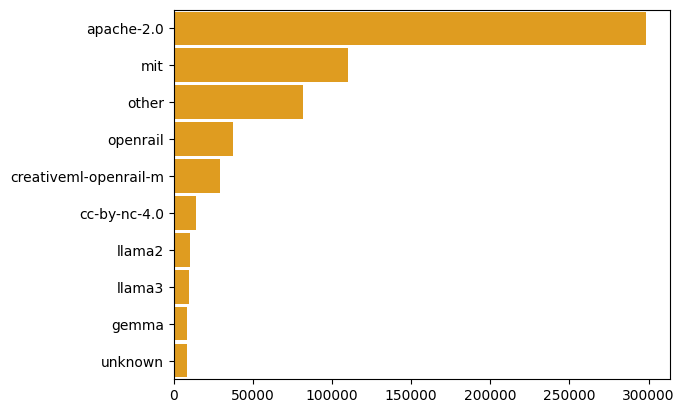

In [44]:
sns.barplot(y=list(licenses), x=list(counts), color='orange', width=.9)


In [ ]:
top_10_downloaded_models = df[['model_id', 'downloads']].nlargest(10, 'downloads')
print(top_10_downloaded_models)


/var/folders/35/rbf5cr3s6wx53bzp489khqh40000gn/T/ipykernel_13715/2730947747.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_yticklabels([list(axes[0,0].get_yticklabels())[i].get_text() + "\n (" + str(np.round(100*counts[i]/len(df[df['licenses'].notna()]), 2)) + "%)" for i in range(len(counts))])
/var/folders/35/rbf5cr3s6wx53bzp489khqh40000gn/T/ipykernel_13715/2730947747.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,2].set_yticklabels([list(axes[0,2].get_yticklabels())[i].get_text() + "\n (" + str(np.round(100*top_20_tasks.values[i]/len(df[df['pipeline_tag'].notna()]), 2)) + "%)" for i in range(len(top_20_tasks))])
/var/folders/35/rbf5cr3s6wx53bzp489khqh40000gn/T/ipykernel_13715/2730947747.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set

[[<Axes: title={'center': ' '}> <Axes: > <Axes: ylabel='pipeline_tag'>
  <Axes: > <Axes: title={'center': ' '}> <Axes: >
  <Axes: ylabel='library_name'>]
 [<Axes: ylabel='parent_model'> <Axes: > <Axes: > <Axes: > <Axes: >
  <Axes: > <Axes: xlabel='downloads', ylabel='model_id'>]]
(2, 7)


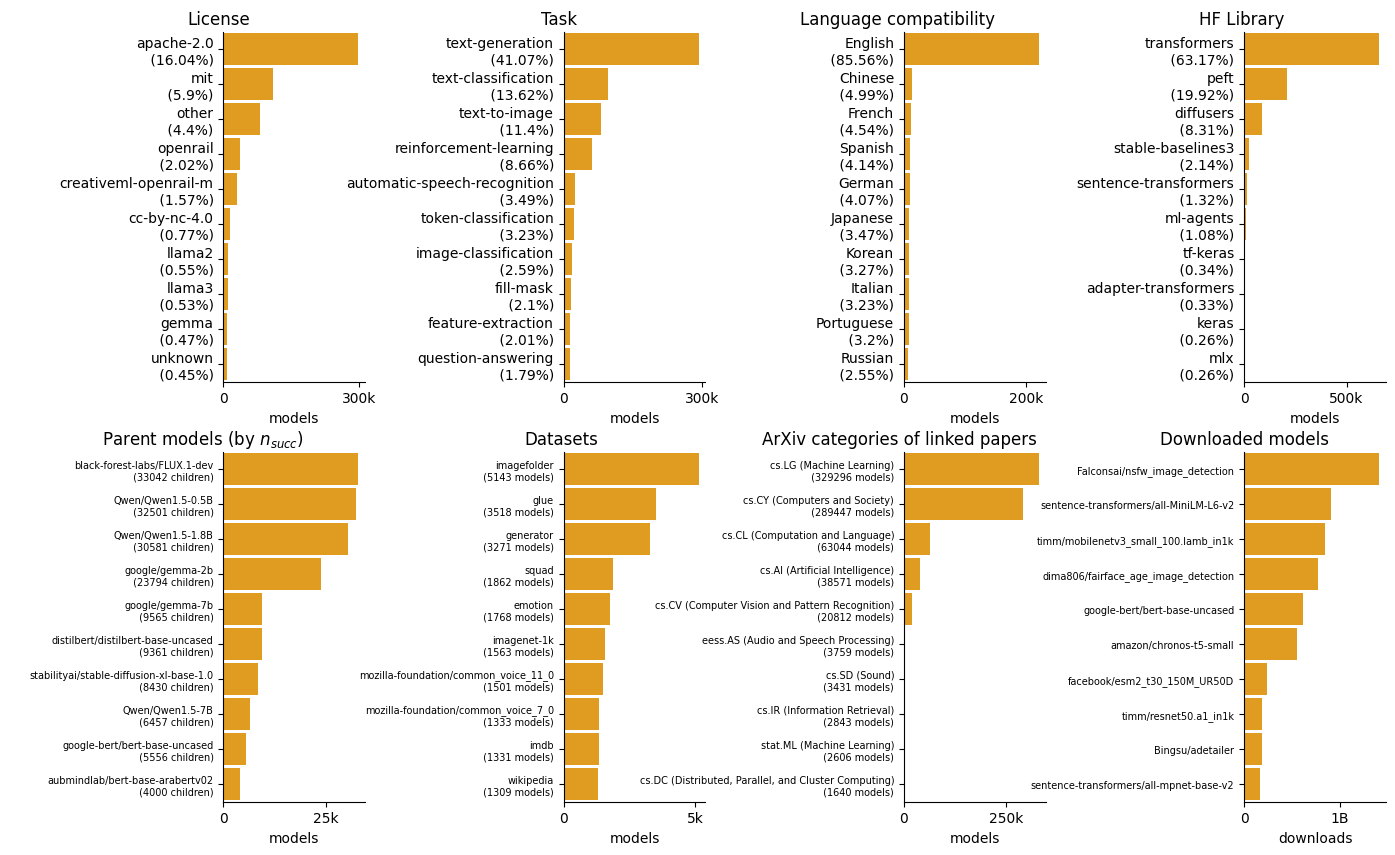

In [55]:
fig, axes = plt.subplots(2, 7, figsize=(15, 10))

#top_20_licenses = df['license'].value_counts().head(N+2)
#top_20_licenses = top_20_licenses[top_20_licenses.index != 'other']
#top_20_licenses = top_20_licenses[top_20_licenses.index != 'unknown']
#top_20_licenses = top_20_licenses[:N]
top_n_licenses = license_counts.most_common(N)
top_n_licenses = [(license, count) for license, count in top_n_licenses]
licenses, counts = zip(*top_n_licenses)
sns.barplot(y=list(licenses), x=list(counts), color='orange', ax=axes[0,0], width=.9)
axes[0,0].set_title(' ')
axes[0,0].set_xticks([0, 300000], labels=['0', '300k'])
axes[0,0].set_yticklabels([list(axes[0,0].get_yticklabels())[i].get_text() + "\n (" + str(np.round(100*counts[i]/len(df[df['licenses'].notna()]), 2)) + "%)" for i in range(len(counts))]) 
axes[0,0].text(-10000, -.85, 'License', ha='center', va='center', fontsize=12)
#sns.barplot(y=top_20_licenses.index, x=top_20_licenses.values, color='orange', ax=axes[0,0], width=.9)
#axes[0,0].set_xticks([0,300000], labels=['0','300k'])
#axes[0,0].set_yticklabels([list(axes[0,0].get_yticklabels())[i].get_text() + "\n (" + str(np.round(100*top_20_licenses.values[i]/len(df[df['license'].notna()]), 2)) + "%)" for i in range(len(top_20_licenses))]) 
#axes[0,0].text(-10000,-.85, 'License', ha='center', va='center')

# Tasks
top_20_tasks = df['pipeline_tag'].value_counts().head(N)
sns.barplot(y=top_20_tasks.index, x=top_20_tasks.values, color='orange', ax=axes[0,2], width=.9)
axes[0,2].set_xticks([0,300000], labels=['0','300k'])
axes[0,2].set_yticklabels([list(axes[0,2].get_yticklabels())[i].get_text() + "\n (" + str(np.round(100*top_20_tasks.values[i]/len(df[df['pipeline_tag'].notna()]), 2)) + "%)" for i in range(len(top_20_tasks))]) 
axes[0,2].text(-10000,-.85, 'Task', ha='center', va='center', fontsize=12)

# Languages
top_n_languages = language_counts.most_common(N)
top_n_languages = [(language, count) for language, count in top_n_languages]
languages, counts = zip(*top_n_languages)
sns.barplot(y=list(languages), x=list(counts), color='orange', ax=axes[0,4], width=.9)
axes[0,4].set_title(' ')
axes[0,4].set_xticks([0,200000], labels=['0','200k'])
axes[0,4].set_yticklabels([list(axes[0,4].get_yticklabels())[i].get_text() + "\n (" + str(np.round(100*counts[i]/len(df[(df['languages'].notna())&(df['languages']!='[]')]), 2)) + "%)" for i in range(len(counts))]) 
axes[0,4].text(-10000,-.85, 'Language compatibility', ha='center', va='center', fontsize=12)

# Libraries
top_20_libraries = df['library_name'].value_counts().head(N)
sns.barplot(y=top_20_libraries.index, x=top_20_libraries.values, color='orange', ax=axes[0,6], width=.9)
axes[0,6].set_xticks([0,500000], labels=['0','500k'])
axes[0,6].set_yticklabels([list(axes[0,6].get_yticklabels())[i].get_text() + "\n (" + str(np.round(100*top_20_libraries.values[i]/len(df[df['library_name'].notna()]), 2)) + "%)" for i in range(len(top_20_libraries))]) 
axes[0,6].text(-10000,-.85, 'HF Library', ha='center', va='center', fontsize=12)

# Parent models
top_20_parent_models = df.loc[df['parent_model']!='[]','parent_model'].dropna().str.replace('[\'', '').str.replace('\']', '').value_counts().head(N)
sns.barplot(y=top_20_parent_models.index, x=top_20_parent_models.values, color='orange', ax=axes[1,0], width=.9)
axes[1,0].set_xticks([0,25000], labels=['0','25k'])
axes[1,0].set_yticklabels([list(axes[1,0].get_yticklabels())[i].get_text() + "\n (" + str(np.round(top_20_parent_models.values[i], 0)) + " children)" for i in range(len(top_20_parent_models))], fontsize=7) 
axes[1,0].text(-5000,-.85, 'Parent models (by $n_{succ}$)', ha='center', va='center', fontsize=12)

# Datasets
top_20_datasets_cleaned = [(str(dataset).replace('dataset:', ''), count) for dataset, count in top_20_datasets[:N]]
top_20_datasets_forplot, counts = zip(*top_20_datasets_cleaned)
sns.barplot(y=list(top_20_datasets_forplot[:10]), x=list(counts[:10]), color='orange', ax=axes[1,2], width=.9)
axes[1,2].set_yticklabels([list(axes[1,2].get_yticklabels())[i].get_text() + "\n (" + str(counts[i]) + " models)" for i in range(len(counts))], fontsize=7) 
axes[1,2].set_xticks([0,5000], labels=['0','5k'])
axes[1,2].text(-100,-.85, 'Datasets', ha='center', va='center', fontsize=12)

# Arxiv categories
top_20_arxiv_categories_cleaned = [(str(category) + " (" + str(arxiv_category_codes_dict[category]) + ")", count) for category, count in top_20_arxiv_categories[:N]]
top_20_arxiv_categories_forplot, counts = zip(*top_20_arxiv_categories_cleaned)
sns.barplot(y=list(top_20_arxiv_categories_forplot[:10]), x=list(counts[:10]), color='orange', ax=axes[1,4], width=.9)
axes[1,4].set_yticklabels([list(axes[1,4].get_yticklabels())[i].get_text() + "\n (" + str(counts[i]) + " models)" for i in range(len(counts))], fontsize=7) 
axes[1,4].set_xticks([0,250000], labels=['0','250k'])
axes[1,4].text(-10000,-.85, 'ArXiv categories of linked papers', ha='center', va='center', fontsize=12)

# Downloaded models
top_10_downloaded_models = df[['model_id', 'downloads']].nlargest(10, 'downloads')
sns.barplot(y=top_10_downloaded_models['model_id'], x=top_10_downloaded_models['downloads'], color='orange', ax=axes[1,6], width=.9)
axes[1,6].set_xticks([0,100000000], labels=['0','1B'])
axes[1,6].set_yticklabels(axes[1,6].get_yticklabels(), fontsize=7)
#axes[1,6].set_yticklabels([list(axes[1,6].get_yticklabels())[i].get_text() + "\n (" + str(top_10_downloaded_models['downloads'][i]) + " downloads)" for i in range(len(top_10_downloaded_models))], fontsize=7) 
axes[1,6].text(-10000,-.85, 'Downloaded models', ha='center', va='center', fontsize=12)

print(axes)
print(axes.shape)
print(enumerate(axes.shape))

#Get all possible combinations of the rows and columns. Do not use enumerate.
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        #ax.set_title(' ')
        axes[i,j].set_ylabel(' ')
        axes[i,j].set_xlabel('models')
        axes[i,j].spines['top'].set_visible(False)
        axes[i,j].spines['right'].set_visible(False)
            
        # For odd numbered axes, get rid of ticks.
        if j % 2 == 1:
            axes[i,j].set_xlabel(' ')
            axes[i,j].set_xticks([])
            axes[i,j].set_yticks([])
            axes[i,j].spines['bottom'].set_visible(False)
            axes[i,j].spines['left'].set_visible(False)

axes[1,6].set_xlabel('downloads')

plt.savefig('figures/megafigure_aug7.png', dpi=400, bbox_inches='tight')
